This tutorial explains how to make a multi-layers Artificial neuronal network (deep learning) using forward-propagation and back-Propagation concepts.

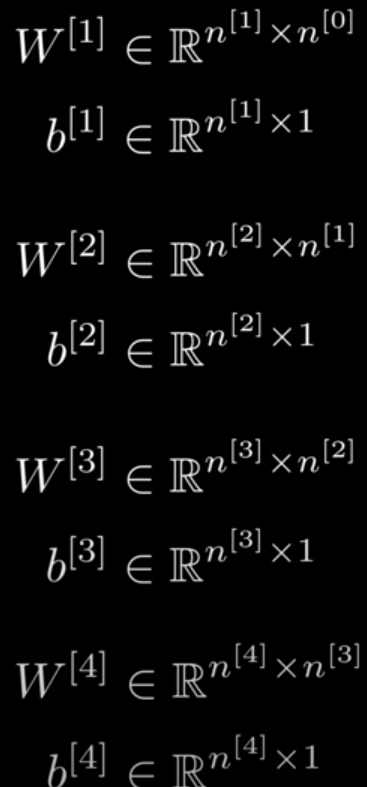
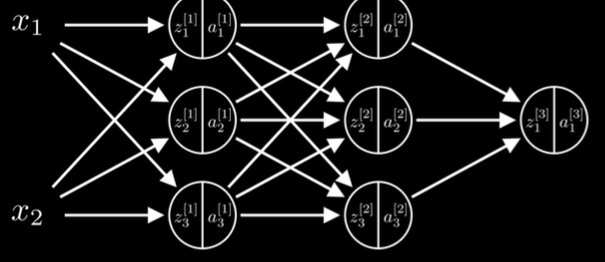
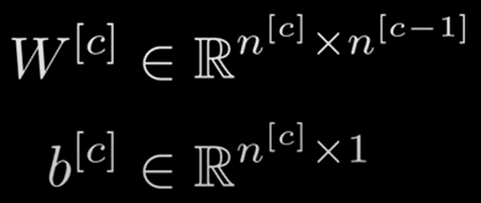

1 - DATASET

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm
import h5py
from utilities import *

dimensions of X: (2, 100)
dimensions of y: (1, 100)


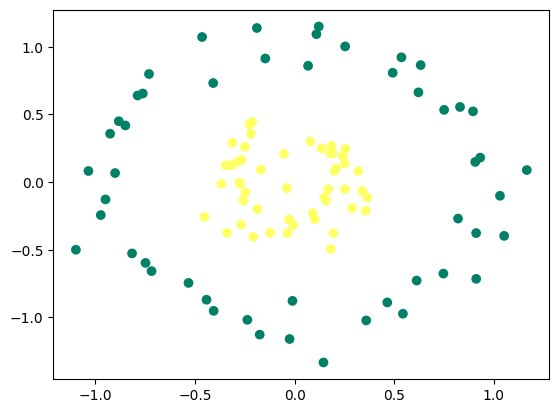

In [64]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions of X:', X.shape)
print('dimensions of y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

2 - Functions definitions

In [65]:
def initialization(layers_dims):
    params = {}
    
    LLD = len(layers_dims)
    for l in range(1, LLD):
        params['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])
        params['b' + str(l)] = np.zeros((layers_dims[l],1))
    return params

- Forward propagation:

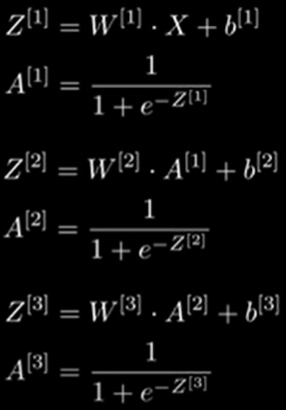
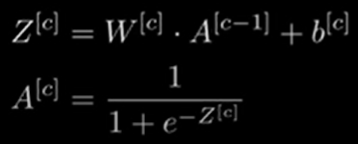

In [66]:
def forward_propagation(params, X, layers_dims):
    Activation = {'A0': X}
    Z = {}
    for l in range(1, len(layers_dims)):
        print(params['W' + str(l)].shape, Activation['A' + str(l-1)].shape)
        Z['Z'+str(l)] = params['W' + str(l)].dot(Activation['A' + str(l-1)]) + params['b' + str(l)]
        Activation['A'+str(l)] = 1 / (1 + np.exp(-Z['Z'+str(l)]))

    return Activation

- Loss function / Log Loss:



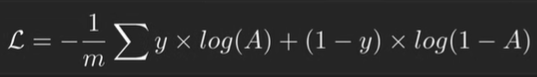

In [67]:
def log_loss2(A, y):
    epsilon = 1e-15
    A = A + epsilon
    loss_function = -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    return loss_function

- Back Propagation:

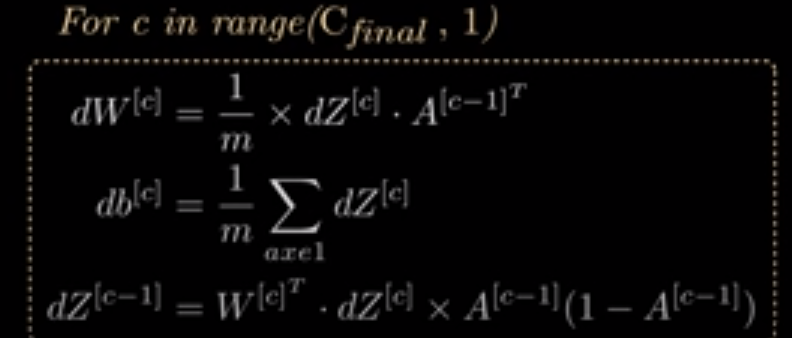
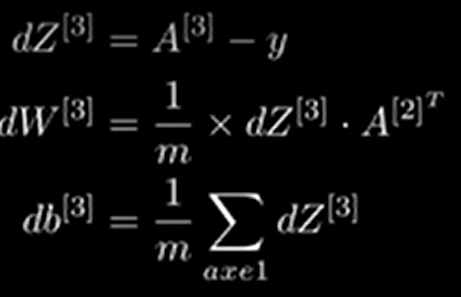
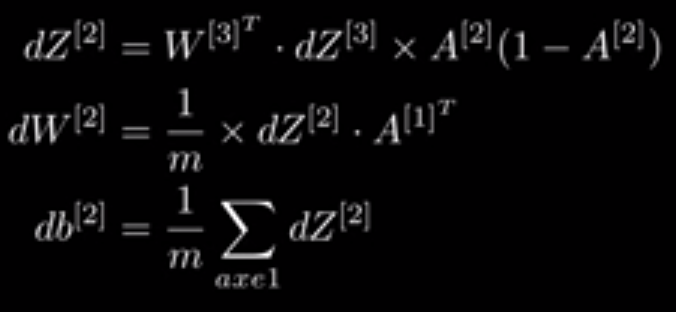
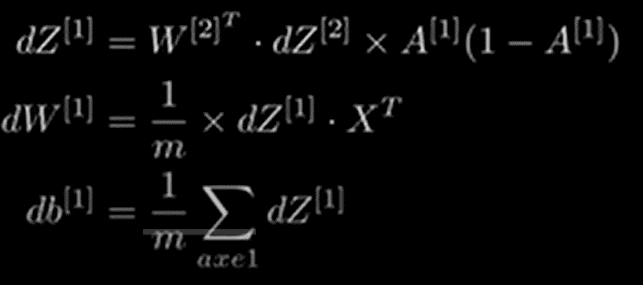

In [68]:
def back_propagation(Activation, params, y, layers_dims):
    dZ, gradients = {}, {}
    m = y.shape[1]
    LLD = len(layers_dims)-1

    dZ['dZ'+str(LLD)] = Activation['A' + str(LLD)] - y
    gradients['dW'+str(LLD)] = 1/m * dZ['dZ'+str(LLD)].dot(Activation['A' + str(LLD-1)].T)
    gradients['db'+str(LLD)] = 1 / m * np.sum(dZ['dZ'+str(LLD)], axis=1, keepdims=True)

    for l in range(LLD-1, 0, -1):
        dZ['dZ'+str(l)] = np.dot(params['W' + str(l+1)].T, dZ['dZ'+str(l+1)]) * Activation['A' + str(l)] * (1 - Activation['A' + str(l)])
        gradients['dW'+str(l)] = 1/m * dZ['dZ'+str(l)].dot(Activation['A' + str(l-1)].T)
        gradients['db'+str(l)] = 1 / m * np.sum(dZ['dZ'+str(l)], axis=1, keepdims=True)

    return gradients

 - Update function:


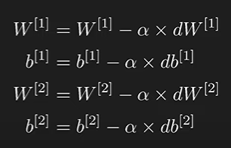

In [69]:
def update(params, gradients, learning_rate, layers_dims):
    LLD = len(layers_dims)

    for l in range(1, LLD):
        params['W'+str(l)] = params['W'+str(l)] - learning_rate * gradients['dW'+str(l)]
        params['b'+str(l)] = params['b'+str(l)] - learning_rate * gradients['db'+str(l)]
        
    return params

3 - Artificial Neuron

In [70]:
def predict(X, params, layers_dims):
    DLL = len(layers_dims)
    Activation = forward_propagation(params, X, layers_dims)
    A = Activation['A'+str(DLL-1)]
    return A >= 0.5


In [71]:
def plot_decision_boundary(X, y, params, layers_dims):
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

    xx, yy= np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    x_in = np.c_[(xx.ravel(), yy.ravel())].T
    A = predict(x_in, params, layers_dims).reshape(xx.shape)

    plt.contourf(xx, yy, A, cmap=plt.cm.RdYlBu, alpha=0.7)
    #plt.legend()
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

In [72]:
#params = initialization([2,32,32,1])
#Activation = forward_propagation(params,[2,32,32,1], X)
#gradients = back_propagation(Activation, params, X, y, [2,32,32,1])
#params = update(params, gradients, learning_rate=0.1, layers_dims=[2,32,32,1])

In [73]:
def neural_network(X, y, layers_dims, learning_rate = 0.1, n_iter = 100):
    # Params initialization
    np.random.seed(0)
    params = initialization(layers_dims)

    train_loss = []
    train_acc = []
    hist = []

    DLL = len(layers_dims)

    # gradient descent
    for i in tqdm(range(n_iter)):
        Activation = forward_propagation(params, X, layers_dims)
        A = Activation['A'+str(DLL-1)]

        # Plot learning curve
        lloss = log_loss(y.flatten(), A.flatten())
        y_pred = predict(X, params, layers_dims)
        accu_score = accuracy_score(y.flatten(), y_pred.flatten())

        train_loss.append(lloss)
        train_acc.append(accu_score)
        hist.append([lloss, accu_score, i])

        # Update
        gradients = back_propagation(Activation, params, y, layers_dims)
        params = update(params, gradients, learning_rate, layers_dims)

    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    plt.plot(train_loss, label='train loss n1={}'.format(layers_dims))
    plt.legend()
    plt.subplot(1, 3, 2)
    plt.plot(train_acc, label='train acc n1={}'.format(layers_dims))
    plt.legend()
    plt.subplot(1, 3, 3)
    plot_decision_boundary(X.T, y, params, layers_dims)
    plt.show()
    return params

4 - Decision boundary

 11%|█         | 11/100 [00:00<00:00, 102.80it/s]

(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 5

 34%|███▍      | 34/100 [00:00<00:00, 108.23it/s]

(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 5

 56%|█████▌    | 56/100 [00:00<00:00, 90.89it/s] 

(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 50

 82%|████████▏ | 82/100 [00:00<00:00, 110.08it/s]

(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 5

100%|██████████| 100/100 [00:00<00:00, 109.17it/s]


(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 500)
(1, 64) (64, 500)
(64, 2) (2, 500)
(64, 64) (64, 500)
(64, 64) (64, 5

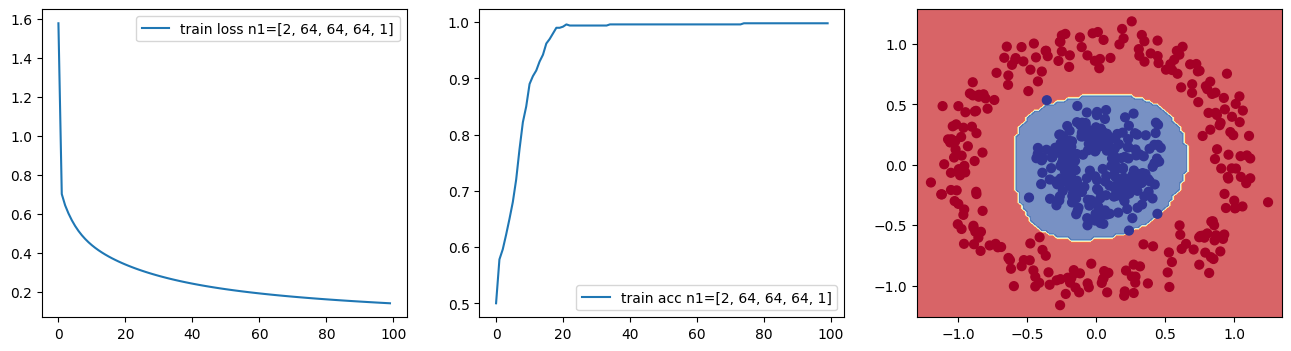

In [74]:
X, y = make_circles(n_samples=500, noise=0.1, factor=0.3)
XT = X.T
yReshap = y.reshape((1, y.shape[0]))

layers_dims = [2,64,64,64,1]
params= neural_network(XT, yReshap,layers_dims)
#Layers = [2, 4, 8, 16, 32]
#for l in Layers:
#    params= neural_network(XT, yReshap, n1=l)

5 - 3D Vizualization

In [75]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy= np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

x_in = np.c_[(xx.ravel(), yy.ravel())].T
A = predict(x_in, params, layers_dims).reshape(xx.shape).astype(int)

fig = (go.Figure(data=[go.Surface(z=A, x=xx, y=yy, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(),
                  mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn',
                                              opacity = 0.9, reversescale=True))

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

(64, 2) (2, 10000)
(64, 64) (64, 10000)
(64, 64) (64, 10000)
(1, 64) (64, 10000)
